<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_8/ImageBasicsWithPillow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PIL/Pillow

The Python Imaging Library (PIL)/Pillow provides support for opening, manipulating, and saving different image file formats.

> NOTE: PIL is not actively maintained and updated, but there is an updated fork of the library called **Pillow**, which provides the same functionality as PIL and also includes bug fixes, new features, and updated file format support.

## Installing PIL/Pillow
To install Pillow, you can use the pip install Pillow:

```python
# not you shouldn't need to do this in colab! 
pip install Pillow
```


## Start with Opening and displaying an image
The first step in working with an image in PIL/Pillow is to open the image file using the Image.open() method. Here's an example of how to open an image file and display it:

```python
# Open the image file
image = Image.open('image.jpg')

# Display the image in a window
image.show()
```

## Manipulating an image
Once you have opened an image file in PIL/Pillow, you can manipulate the image in various ways. Here are some common image manipulation operations:

### Resizing an image
To resize an image, you can use the Image.resize() method. Here's an example:

```pythyon

# Resize the image to 50% of its original size
new_size = (int(image.width * 0.5), int(image.height * 0.5))
resized_image = image.resize(new_size)

# Display the resized image in a window
resized_image.show()
```

## Rotating an image
To rotate an image, you can use the Image.rotate() method. Here's an example:

```python
# Rotate the image by 45 degrees
rotated_image = image.rotate(45)

# Display the rotated image in a window
rotated_image.show()
```


# Let's get Started with Images 



---


The Python Imaging Library (PIL)/Pillow provides support for opening, manipulating, and saving different image file formats.

> NOTE: While PIL is not actively maintained and updated,  there is an updated fork of the library called **Pillow**, which provides the same functionality as PIL and also includes bug fixes, new features, and updated file format support.

## Installing PIL/Pillow
To install Pillow, you can use the `pip install Pillow` though you shouldn't need to install Pillow or PIL when using Colab. 



---

We'll begin by importing the following libraries:

- requests: This library is used to send HTTP/1.1 requests and handle responses in Python. It provides a simple and elegant way to interact with APIs and web services, making it easy to integrate with various web-based applications. We will use it to extract images from GitHub.
- PIL: This is our library for opening, manipulating, and saving different image file formats.
- io and BytesIO: These modules are built-in Python packages that provide tools to handle and manipulate input and output streams, such as files, sockets, and strings. BytesIO allows us to work with in-memory binary data as if it were a file. It provides a file-like interface for reading and writing bytes to a buffer in memory, without the need for an actual file on disk.
- IPython.display: This module provides a way to display rich media such as images, videos, HTML, and Markdown in Jupyter notebooks or IPython shells.


In [59]:
# -- import image libraries --
import requests
from PIL import Image, ImageDraw
from io import BytesIO
from IPython.display import display

## My Dog MAX


---

We'll begin by using images of my chocolate Labrador retriever named Max, who also goes by Maxwell, Maxwell not so Smart, and Butter Boy.

I've dumped a couple of images out on GitHub we'll see how we can download and display a remote image. 

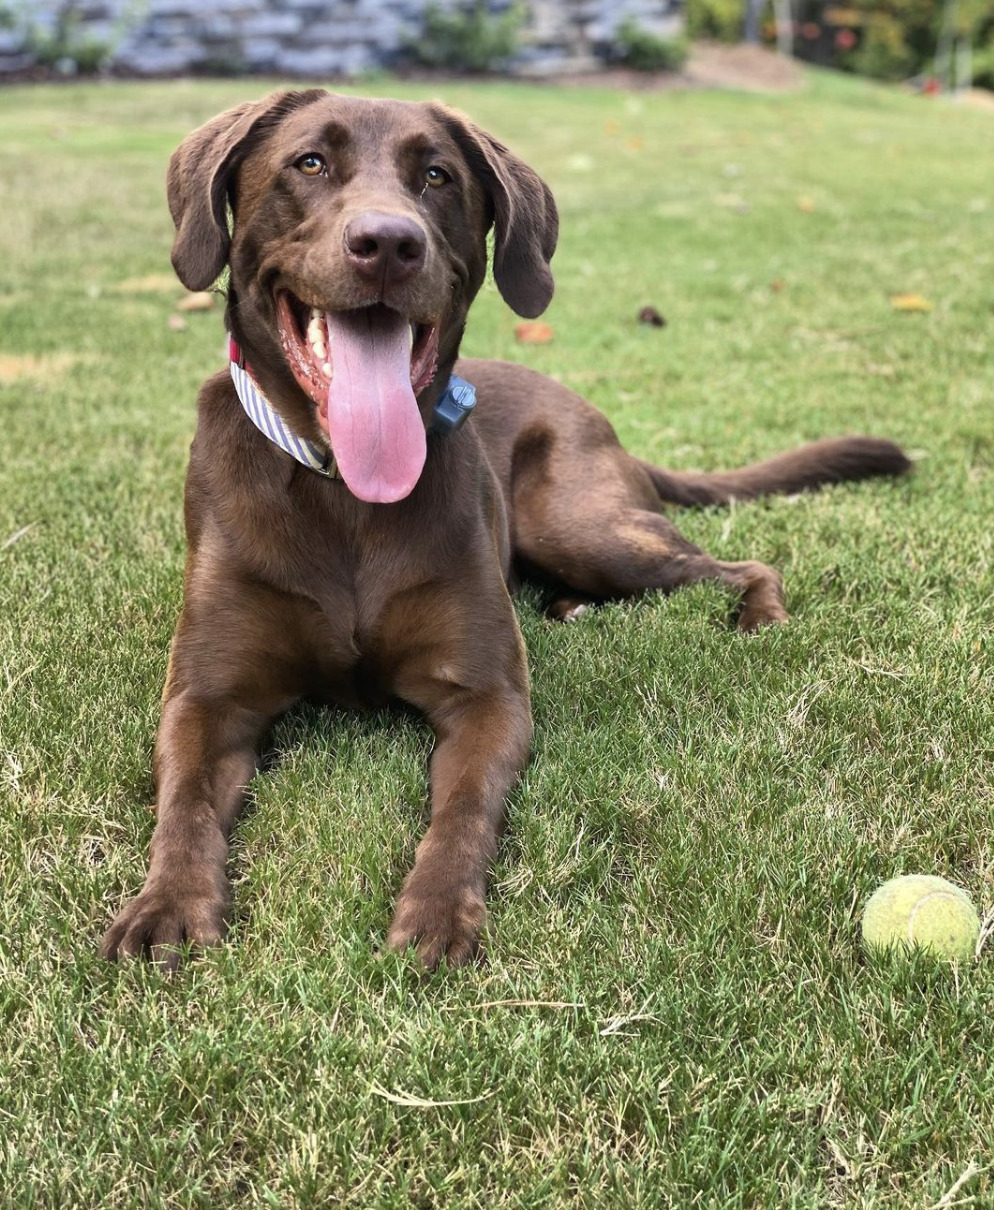

In [60]:
# Define the URL of the image file on GitHub
url = "https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_8/img/max_dog.jpg"

# Send an HTTP GET request to the image file URL and store the image content in a variable
response = requests.get(url)
image_content = response.content

# Open the image content as an Image object
image = Image.open(BytesIO(image_content))

# Display the image in the Colab notebook
display(image)


## Resize the image 


---
We'll start by getting the existing size of the image then shrinking it down to 





In [61]:
# Get the existing size of the image
width, height = image.size
print('The image size is {} pixels wide X {} pixels tall.'.format(width,height))


The image size is 994 pixels wide X 1210 pixels tall.


## Blindly change it to 800 X 800


---

As you can see blindly resizing both hight and width throws off the aspect ratio. I suspect we've all done this at one time or another in PowerPoint too!  


In [ ]:
# Resize the image to a new size
new_size = (800, 800)
resized_image = image.resize(new_size)

# display
display(resized_image)

## Calcualting an Aspect Ratio 


---

Here we can simply calcualte an aspect ratio by dividing height by width and multiplyin the aspect ratio by width for example to get the height or setting the height and multipling the width. 


In [ ]:
# Calculate the new height while preserving the aspect ratio
width, height = image.size
aspect_ratio = height / width
new_height = int(aspect_ratio * 800)

print('aspect ratio {:.4f}'.format(aspect_ratio))
# Resize the image to a new size
new_size = (800, new_height)
resized_image = image.resize(new_size)

width, height = resized_image.size
print('resizing to be {} pixels wide X {} pixels tall'.format(width,new_height))

# Save the resized image to a file
display(resized_image)


## Draw a Bounding Box


---

The `ImageDraw` module provides a `Draw` object that can be used to draw various shapes on an image, such as lines, circles, and rectangles. Here's an example of how to add a bounding box to an image:

In [ ]:
# Create a Draw object
draw = ImageDraw.Draw(resized_image)

# Define the bounding box as a tuple
left = 100
top = 90
right = 500
bottom = 420
bounding_box = (left, top, right, bottom)

# Draw a rectangle on the image
draw.rectangle(bounding_box, outline='red', width=2)
display(resized_image)


In [ ]:
# Create two Draw objects with different colors
draw_red = ImageDraw.Draw(resized_image)
draw_blue = ImageDraw.Draw(resized_image)

# Draw a red rectangle using the first Draw object
left = 100
top = 90
right = 500
bottom = 420
bounding_box_red = (left, top, right, bottom)

draw_red.rectangle(bounding_box_red, outline='red', width=2)

# Draw a blue rectangle using the second Draw object
bounding_box_blue = (700, 700, 790, 800)
draw_blue.rectangle(bounding_box_blue, outline='blue', width=2)
display(resized_image)
# Save the modified image
#image.save('image_with_two_rectangles.jpg')

In [ ]:
# Create a Draw object and draw a rectangle
draw = ImageDraw.Draw(resized_image)
bounding_box = (100, 100, 500, 500)
draw.rectangle(bounding_box, outline='red', width=2)

# Clear the rectangle by creating a new Draw object
draw = ImageDraw.Draw(resized_image)
display(resized_image)


## How about Crop? 


---



In [ ]:
import numpy as np
from PIL import Image
#from Pillow import Image

# Load the image and convert it to grayscale
img = Image.open('https://github.com/MonkeyWrenchGang/MGTPython/blob/main/module_8/img/max_dog.jpg').convert('L')

# Resize the image to a fixed size
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Flatten the array into a 1D vector
img_vector = img_array.flatten()

# Normalize the vector to have values between 0 and 1
img_vector = img_vector / 255.0

#print(img_vector)




In [ ]:
!pip install Pillow


In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np

# Load the image and resize it
img = Image.open('max_dog.jpg').resize((224, 224))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the pixel values
img_array = img_array / 255.0

# Load the pre-trained model
model = tf.keras.applications.MobileNetV2()

# Make a prediction
predictions = model.predict(np.expand_dims(img_array, axis=0))

# Get the top prediction
predicted_class = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)[0][0]

# Print the result
print(f"The image is most likely a {predicted_class[1]} with a confidence of {predicted_class[2]:.2%}.")
